# Pandas<a href="https://github.com/milocortes/python_course_summer_school_DMDU_2022/blob/main/notebooks/pandas_dmdu_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
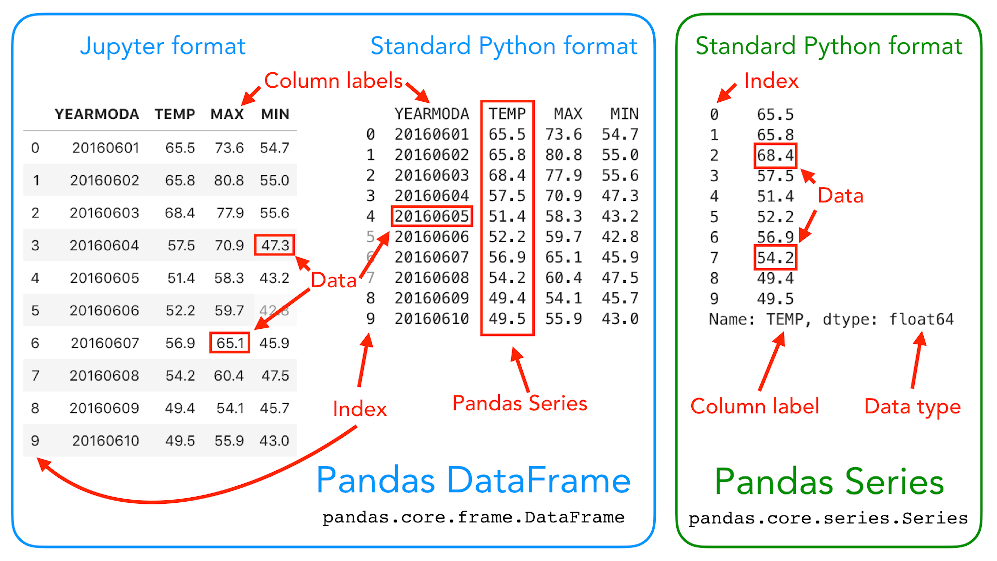


# Pandas 
Pandas is a library for manipulating structured data.

## Importing a data set
We’ll import the pandas library to gain access to its features:

In [3]:
import pandas as pd

Our data is stored in a single <code>movies.csv</code> file. A CSV (comma-separated values) file
is a plain-text file that separates each row of data with a line break and each row value
with a comma. The first row in the file holds the column headers for the data. Here’s
a preview of the first three rows of movies.csv:
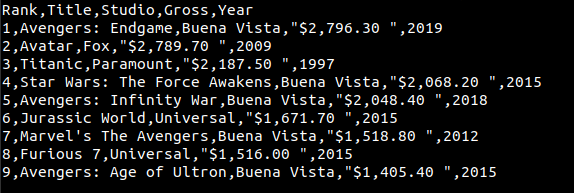

We’ll use the read_csv function to import the movies.csv file:

In [7]:
movies = pd.read_csv("../data/movies.csv")
movies

Rank                         Title           Studio       Gross  Year
0       1             Avengers: Endgame      Buena Vista  $2,796.30   2019
1       2                        Avatar              Fox  $2,789.70   2009
2       3                       Titanic        Paramount  $2,187.50   1997
3       4  Star Wars: The Force Awakens      Buena Vista  $2,068.20   2015
4       5        Avengers: Infinity War      Buena Vista  $2,048.40   2018
..    ...                           ...              ...         ...   ...
777   778                     Yogi Bear  Warner Brothers    $201.60   2010
778   779           Garfield: The Movie              Fox    $200.80   2004
779   780                   Cats & Dogs  Warner Brothers    $200.70   2001
780   781      The Hunt for Red October        Paramount    $200.50   1990
781   782                      Valkyrie              MGM    $200.30   2008

[782 rows x 5 columns]

Pandas imports the CSV file’s contents into an object called a <code>DataFrame</code> . Think of an object as a container for storing data.  

Pandas uses one type ofobject (the <code>DataFrame</code>) to store multicolumn data sets and another type of object(the <code>Series</code>) to store single-column data sets.

This <code>DataFrame</code> consists of five columns (Rank, Title, Studio, Gross, Year) and an index. 

The index is the range of ascending numbers on the left side of the <code>DataFrame</code>. 

Index labels serve as identifiers for rows of data. We can set any column as the index of the <code>DataFrame<code>.

Let’s swap the autogenerated numeric index with the values from the Title column. We can do so directly during the CSV import:

In [8]:
movies = pd.read_csv("../data/movies.csv", index_col = "Title")
movies

Rank           Studio       Gross  Year
Title                                                                
Avengers: Endgame                1      Buena Vista  $2,796.30   2019
Avatar                           2              Fox  $2,789.70   2009
Titanic                          3        Paramount  $2,187.50   1997
Star Wars: The Force Awakens     4      Buena Vista  $2,068.20   2015
Avengers: Infinity War           5      Buena Vista  $2,048.40   2018
...                            ...              ...         ...   ...
Yogi Bear                      778  Warner Brothers    $201.60   2010
Garfield: The Movie            779              Fox    $200.80   2004
Cats & Dogs                    780  Warner Brothers    $200.70   2001
The Hunt for Red October       781        Paramount    $200.50   1990
Valkyrie                       782              MGM    $200.30   2008

[782 rows x 4 columns]

## Manipulating a DataFrame
We can extract a few rows from the beginning:

In [9]:
movies.head(4)

Rank       Studio       Gross  Year
Title                                                            
Avengers: Endgame                1  Buena Vista  $2,796.30   2019
Avatar                           2          Fox  $2,789.70   2009
Titanic                          3    Paramount  $2,187.50   1997
Star Wars: The Force Awakens     4  Buena Vista  $2,068.20   2015

Or we can peek at the end of the data set instead:

In [11]:
movies.tail(4)

Rank           Studio     Gross  Year
Title                                                          
Garfield: The Movie        779              Fox  $200.80   2004
Cats & Dogs                780  Warner Brothers  $200.70   2001
The Hunt for Red October   781        Paramount  $200.50   1990
Valkyrie                   782              MGM  $200.30   2008

We can find out how many rows the <code>DataFrame</code> has:

In [12]:
len(movies)

782

We can ask pandas for the number of rows and columns in the <code>DataFrame</code>.

In [13]:
movies.shape

(782, 4)

We can ask for the data types of the four columns. In the following output, <code>int64</code> denotes an integer column, and <code>object</code> denotes a text column:

In [14]:
movies.dtypes

Rank       int64
Studio    object
Gross     object
Year       int64
dtype: object

We can extract a row from the data set by its numeric order in line, also called its index position.

In [15]:
movies.iloc[499]

Rank           500
Studio         Fox
Gross     $288.30 
Year          2018
Name: Maze Runner: The Death Cure, dtype: object

Pandas returns a new object here called a <code>Series</code> , a one-dimensional labeled array of values. Think of it as a single column of data with an identifier for each row. 

Notice that the <code>Series</code>’ index labels (Rank, Studio, Gross, and Year) are the four columns from the <code>movies DataFrame</code>.

We can also use an index label to access a DataFrame row. As a reminder, our DataFrame index holds the films’ titles. 

Let’s extract the row values for  *Forrest Gump*. The next example extracts a row by its index label rather than its numeric position:

In [16]:
movies.loc["Forrest Gump"]

Rank            119
Studio    Paramount
Gross      $677.90 
Year           1994
Name: Forrest Gump, dtype: object

Index labels can contain duplicates. Two movies in the <code>DataFrame</code> have the title "<code>101 Dalmatians</code>" , for example (the 1961 original and the 1996 remake):

In [17]:
movies.loc["101 Dalmatians"]

Rank       Studio     Gross  Year
Title                                            
101 Dalmatians   425  Buena Vista  $320.70   1996
101 Dalmatians   708  Buena Vista  $215.90   1961

Although pandas permits duplicates, I recommend keeping index labels unique if possible.

The films in the CSV are sorted by values in the Rank column. We can sort the <code>DataFrame</code> by the values in another column, such as Year:

In [18]:
movies.sort_values(by = "Year", ascending = False).head()

Rank                  Studio  \
Title                                                                      
Avengers: Endgame                              1             Buena Vista   
John Wick: Chapter 3 - Parabellum            458               Lionsgate   
The Wandering Earth                          114  China Film Corporation   
Toy Story 4                                  198             Buena Vista   
How to Train Your Dragon: The Hidden World   199               Universal   

                                                 Gross  Year  
Title                                                         
Avengers: Endgame                           $2,796.30   2019  
John Wick: Chapter 3 - Parabellum             $304.70   2019  
The Wandering Earth                           $699.80   2019  
Toy Story 4                                   $519.80   2019  
How to Train Your Dragon: The Hidden World    $519.80   2019

We can also sort <code>DataFrames</code> by values across multiple columns. Let’s sort movies first by the Studio column’s values and then by the Year column’s values. Now we can see the films organized alphabetically by both studio and release date:

In [19]:
movies.sort_values(by = ["Studio", "Year"]).head()

Rank       Studio     Gross  Year
Title                                                     
The Blair Witch Project   588      Artisan  $248.60   1999
101 Dalmatians            708  Buena Vista  $215.90   1961
The Jungle Book           755  Buena Vista  $205.80   1967
Who Framed Roger Rabbit   410  Buena Vista  $329.80   1988
Dead Poets Society        636  Buena Vista  $235.90   1989

We can also sort the index, which is helpful if we want to see the movies in alphabeti-
cal order:

In [20]:
movies.sort_index().head()

Rank           Studio     Gross  Year
Title                                                  
10,000 B.C.        536  Warner Brothers  $269.80   2008
101 Dalmatians     708      Buena Vista  $215.90   1961
101 Dalmatians     425      Buena Vista  $320.70   1996
2 Fast 2 Furious   632        Universal  $236.40   2003
2012                93             Sony  $769.70   2009

## Counting values in a Series

What if we wanted to find out which movie studio had the greatest number of highest-grossing films? To solve this problem, we’ll need to count the number of times each studio appears in the Studio column.

We can extract a single column of data from a <code>DataFrame</code> as a <code>Series</code>. Notice that pandas preserves the <code>DataFrame</code>’s index, the movie titles, in the Series :

In [23]:
movies["Studio"]

Title
Avengers: Endgame                   Buena Vista
Avatar                                      Fox
Titanic                               Paramount
Star Wars: The Force Awakens        Buena Vista
Avengers: Infinity War              Buena Vista
                                     ...       
Yogi Bear                       Warner Brothers
Garfield: The Movie                         Fox
Cats & Dogs                     Warner Brothers
The Hunt for Red October              Paramount
Valkyrie                                    MGM
Name: Studio, Length: 782, dtype: object

Now that we’ve isolated the Studio column, we can count each unique value’s number of occurrences. Let’s limit our results to the top 10 studios:

In [24]:
movies["Studio"].value_counts().head(10)

Warner Brothers    132
Buena Vista        125
Fox                117
Universal          109
Sony                86
Paramount           76
Dreamworks          27
Lionsgate           21
New Line            16
MGM                 11
Name: Studio, dtype: int64

## Filtering a column by one or more criteria

You’ll often want to extract a subset of rows based on one or more criteria.

What if we wanted to find only the films released by Universal Studios? We can
accomplish this task with one line of code in pandas:

In [25]:
movies[movies["Studio"] == "Universal"]

Rank     Studio       Gross  Year
Title                                                            
Jurassic World                     6  Universal  $1,671.70   2015
Furious 7                          8  Universal  $1,516.00   2015
Jurassic World: Fallen Kingdom    13  Universal  $1,309.50   2018
The Fate of the Furious           17  Universal  $1,236.00   2017
Minions                           19  Universal  $1,159.40   2015
...                              ...        ...         ...   ...
The Break-Up                     763  Universal    $205.00   2006
Everest                          766  Universal    $203.40   2015
Patch Adams                      772  Universal    $202.30   1998
Kindergarten Cop                 775  Universal    $202.00   1990
Straight Outta Compton           776  Universal    $201.60   2015

[109 rows x 4 columns]

or equivalently we can use the <code>query</code> method:

In [26]:
movies.query("Studio=='Universal'")

Rank     Studio       Gross  Year
Title                                                            
Jurassic World                     6  Universal  $1,671.70   2015
Furious 7                          8  Universal  $1,516.00   2015
Jurassic World: Fallen Kingdom    13  Universal  $1,309.50   2018
The Fate of the Furious           17  Universal  $1,236.00   2017
Minions                           19  Universal  $1,159.40   2015
...                              ...        ...         ...   ...
The Break-Up                     763  Universal    $205.00   2006
Everest                          766  Universal    $203.40   2015
Patch Adams                      772  Universal    $202.30   1998
Kindergarten Cop                 775  Universal    $202.00   1990
Straight Outta Compton           776  Universal    $201.60   2015

[109 rows x 4 columns]

We can also filter <code>DataFrame</code> rows by multiple criteria. The next example targets all movies released by Universal Studios *and* released in 2015:

In [37]:
movies[(movies["Studio"] == "Universal") & (movies["Year"] == 2015)]

Rank     Studio       Gross  Year
Title                                                    
Jurassic World             6  Universal  $1,671.70   2015
Furious 7                  8  Universal  $1,516.00   2015
Minions                   19  Universal  $1,159.40   2015
Fifty Shades of Grey     165  Universal    $571.00   2015
Pitch Perfect 2          504  Universal    $287.50   2015
Ted 2                    702  Universal    $216.70   2015
Everest                  766  Universal    $203.40   2015
Straight Outta Compton   776  Universal    $201.60   2015

or equivalently with <code>query</code>:

In [38]:
movies.query("Studio=='Universal' and Year==2015")

Rank     Studio       Gross  Year
Title                                                    
Jurassic World             6  Universal  $1,671.70   2015
Furious 7                  8  Universal  $1,516.00   2015
Minions                   19  Universal  $1,159.40   2015
Fifty Shades of Grey     165  Universal    $571.00   2015
Pitch Perfect 2          504  Universal    $287.50   2015
Ted 2                    702  Universal    $216.70   2015
Everest                  766  Universal    $203.40   2015
Straight Outta Compton   776  Universal    $201.60   2015

The previous example includes rows that satisfied both conditions. We can also filter for films that fit either condition: released by Universal *or* released in 2015.

In [39]:
movies[(movies["Studio"] == "Universal") | (movies["Year"] == 2015)]

Rank       Studio       Gross  Year
Title                                                              
Star Wars: The Force Awakens       4  Buena Vista  $2,068.20   2015
Jurassic World                     6    Universal  $1,671.70   2015
Furious 7                          8    Universal  $1,516.00   2015
Avengers: Age of Ultron            9  Buena Vista  $1,405.40   2015
Jurassic World: Fallen Kingdom    13    Universal  $1,309.50   2018
...                              ...          ...         ...   ...
The Break-Up                     763    Universal    $205.00   2006
Everest                          766    Universal    $203.40   2015
Patch Adams                      772    Universal    $202.30   1998
Kindergarten Cop                 775    Universal    $202.00   1990
Straight Outta Compton           776    Universal    $201.60   2015

[140 rows x 4 columns]

or equivalently with query:

In [40]:
movies.query("Studio=='Universal' or Year==2015")

Rank       Studio       Gross  Year
Title                                                              
Star Wars: The Force Awakens       4  Buena Vista  $2,068.20   2015
Jurassic World                     6    Universal  $1,671.70   2015
Furious 7                          8    Universal  $1,516.00   2015
Avengers: Age of Ultron            9  Buena Vista  $1,405.40   2015
Jurassic World: Fallen Kingdom    13    Universal  $1,309.50   2018
...                              ...          ...         ...   ...
The Break-Up                     763    Universal    $205.00   2006
Everest                          766    Universal    $203.40   2015
Patch Adams                      772    Universal    $202.30   1998
Kindergarten Cop                 775    Universal    $202.00   1990
Straight Outta Compton           776    Universal    $201.60   2015

[140 rows x 4 columns]

Pandas provides additional ways to filter a <code>DataFrame</code>. We can target column values
less than or greater than a specific value, for example. Here, we target movies released
before 1975:

In [41]:
movies[movies["Year"] < 1975]

Rank           Studio     Gross  Year
Title                                                    
The Exorcist         252  Warner Brothers  $441.30   1973
Gone with the Wind   288              MGM  $402.40   1939
Bambi                540              RKO  $267.40   1942
The Godfather        604        Paramount  $245.10   1972
101 Dalmatians       708      Buena Vista  $215.90   1961
The Jungle Book      755      Buena Vista  $205.80   1967

or equivalently with <code>query</code>:

In [42]:
movies.query("Year<1975")

Rank           Studio     Gross  Year
Title                                                    
The Exorcist         252  Warner Brothers  $441.30   1973
Gone with the Wind   288              MGM  $402.40   1939
Bambi                540              RKO  $267.40   1942
The Godfather        604        Paramount  $245.10   1972
101 Dalmatians       708      Buena Vista  $215.90   1961
The Jungle Book      755      Buena Vista  $205.80   1967

We can also specify a range between which all values must fall. The next example pulls out movies released between 1983 and 1986:

In [43]:
movies[movies["Year"].between(1983, 1986)]

Rank     Studio     Gross  Year
Title                                                                
Return of the Jedi                     222        Fox  $475.10   1983
Back to the Future                     311  Universal  $381.10   1985
Top Gun                                357  Paramount  $356.80   1986
Indiana Jones and the Temple of Doom   403  Paramount  $333.10   1984
Crocodile Dundee                       413  Paramount  $328.20   1986
Beverly Hills Cop                      432  Paramount  $316.40   1984
Rocky IV                               467        MGM  $300.50   1985
Rambo: First Blood Part II             469    TriStar  $300.40   1985
Ghostbusters                           485   Columbia  $295.20   1984
Out of Africa                          662  Universal  $227.50   1985

or equivalently with <code>query</code>:

In [45]:
movies.query("(Year>=1983 and Year<=1986)")

Rank     Studio     Gross  Year
Title                                                                
Return of the Jedi                     222        Fox  $475.10   1983
Back to the Future                     311  Universal  $381.10   1985
Top Gun                                357  Paramount  $356.80   1986
Indiana Jones and the Temple of Doom   403  Paramount  $333.10   1984
Crocodile Dundee                       413  Paramount  $328.20   1986
Beverly Hills Cop                      432  Paramount  $316.40   1984
Rocky IV                               467        MGM  $300.50   1985
Rambo: First Blood Part II             469    TriStar  $300.40   1985
Ghostbusters                           485   Columbia  $295.20   1984
Out of Africa                          662  Universal  $227.50   1985

We can also use the DataFrame index to filter rows. The next example lowercases the movie titles in the index and finds all movies with the word "<code>dark</code>" in their title:

In [46]:
has_dark_in_title = movies.index.str.lower().str.contains("dark")
movies[has_dark_in_title]

Rank           Studio       Gross  Year
Title                                                                  
Transformers: Dark of the Moon    23        Paramount  $1,123.80   2011
The Dark Knight Rises             27  Warner Brothers  $1,084.90   2012
The Dark Knight                   39  Warner Brothers  $1,004.90   2008
Thor: The Dark World             132      Buena Vista    $644.60   2013
Star Trek Into Darkness          232        Paramount    $467.40   2013
Fifty Shades Darker              309        Universal    $381.50   2017
Dark Shadows                     600  Warner Brothers    $245.50   2012
Dark Phoenix                     603              Fox    $245.10   2019

## Grouping data
We might be curious which studio had the highest total grosses across all films. Let’s aggregate the values in the Gross column by studio. Our first dilemma is that the Gross column’s values are stored as text rather than as
numbers.

Pandas imported the column’s values as text to preserve the dollar signs and
comma symbols in the original CSV. We can convert the column’s values to decimal
numbers, but only if we remove both of those characters.

We can solve this problem with <code>lambda</code> functions and the class method <code>apply</code>

In [54]:
movies["Gross"].apply(lambda x: float(x.replace("$","").replace(",","")))

Title
Avengers: Endgame               2796.3
Avatar                          2789.7
Titanic                         2187.5
Star Wars: The Force Awakens    2068.2
Avengers: Infinity War          2048.4
                                 ...  
Yogi Bear                        201.6
Garfield: The Movie              200.8
Cats & Dogs                      200.7
The Hunt for Red October         200.5
Valkyrie                         200.3
Name: Gross, Length: 782, dtype: float64

Explicitly overwrites the Gross column in movies with a new column of decimal-point numbers. Now the transformation is permanent

In [55]:
movies["Gross"] = movies["Gross"].apply(lambda x: float(x.replace("$","").replace(",","")))


The next example calculates the average box-office gross of the movies:

In [57]:
movies["Gross"].mean()

439.0308184143226

Let’s return to our original problem: calculating the aggregate box-office grosses per film studio. First, we’ll need to identify the studios and bucket the movies (or rows) that belong to each one. 

This process is called **grouping**. 

In the next example, we group the <code>DataFrame</code>’s rows based on values in the Studio column:

In [59]:
studios = movies.groupby("Studio")
studios["Gross"].count().head()

Studio
Artisan                     1
Buena Vista               125
CL                          1
China Film Corporation      1
Columbia                    5
Name: Gross, dtype: int64

The previous results are sorted alphabetically by studio name. We can instead sort the
<code>Series</code> by count of films, from most to least:

In [60]:
studios["Gross"].count().sort_values(ascending = False).head()

Studio
Warner Brothers    132
Buena Vista        125
Fox                117
Universal          109
Sony                86
Name: Gross, dtype: int64

We want to identify the studios with the highest grosses, so let’s sort the Series values in descending order. Here are the five studios with the greatest grosses:

In [61]:
studios["Gross"].sum().sort_values(ascending = False).head()

Studio
Buena Vista        73585.0
Warner Brothers    58643.8
Fox                50420.8
Universal          44302.3
Sony               32822.5
Name: Gross, dtype: float64